In [8]:
%matplotlib  inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [9]:
qian = pd.read_excel("./data/1000_youth_talent.xlsx",header=0, skiprows=1)
qian.columns = ["ID","Name","Gender","year-month-day","year_birth","university","major"]

In [10]:
qian.head()

,ID,Name,Gender,year-month-day,year_birth,university,major
0,1,张照亮,男,1980/12/14,1980,安徽农业大学,生命科学
1,2,田志宇,男,1984/10/31,1984,北京大学,数学
2,3,訚琪峥,男,1986/7/18,1986,北京大学,数学
3,4,周珍楠,男,1987/11/30,1987,北京大学,数学
4,5,何庆林,男,1988/10/5,1988,北京大学,物理


***
### 1.1 Those who has intresting name

In [11]:
qian[pd.Series([False if (len(i) ==2 or len(i) ==3) else True  for i in qian["Name"]])]

,ID,Name,Gender,year-month-day,year_birth,university,major
16,17,桑田幹哲,男,1981/12/14,1981,北京大学,环境与地球科学
26,27,PhilipDALLADAY-SIMPSON,男,1988/6/19,1988,北京高压科学研究中心,物理
30,31,藤本桂三,男,1977/12/11,1977,北京航空航天大学,环境与地球科学
33,34,OmidMAHIAN,男,1984/8/30,1984,北京航空航天大学,工程科学
127,128,MasoudHAYATDAVOODI,男,1981/9/14,1981,哈尔滨工程大学,工程科学
148,149,KonstantinDORFMAN,男,1986/3/4,1986,华东师范大学,物理
152,153,DylanCRAVEN,男,1978/5/22,1978,华东师范大学,环境与地球科学
245,246,WillDONOVAN,男,1982/6/6,1982,清华大学,数学
290,291,CharlesDAVID,男,1979/9/15,1979,清华大学,医学
307,308,BunditLAEKHANUKIT,男,1981/4/12,1981,上海财经大学,信息科学


### 1.2 Gender distribution

In [12]:
qian.groupby("Gender").size()

Gender
女     81
男    549
dtype: int64

***
### 2. Age distribution in different gender category.

In [13]:
#Code to get the age distribution of male and female
qian_male = qian[qian["Gender"] == u"男"]
qian_female = qian[qian["Gender"] == u"女"]
qian_male_age = pd.Series(2017 - np.array(qian_male["year_birth"])).value_counts().sort_index()
qian_female_age = pd.Series(2017 - np.array(qian_female["year_birth"])).value_counts().sort_index()
qian_male_age = pd.DataFrame(qian_male_age).reset_index(); qian_male_age.columns = ["age","male_num"]
qian_female_age = pd.DataFrame(qian_female_age).reset_index(); qian_female_age.columns = ["age","female_num"]
age_count = qian_male_age.merge(qian_female_age,how="outer")
age_count = age_count.fillna(0); age_count["female_num"] = age_count["female_num"].astype("int")



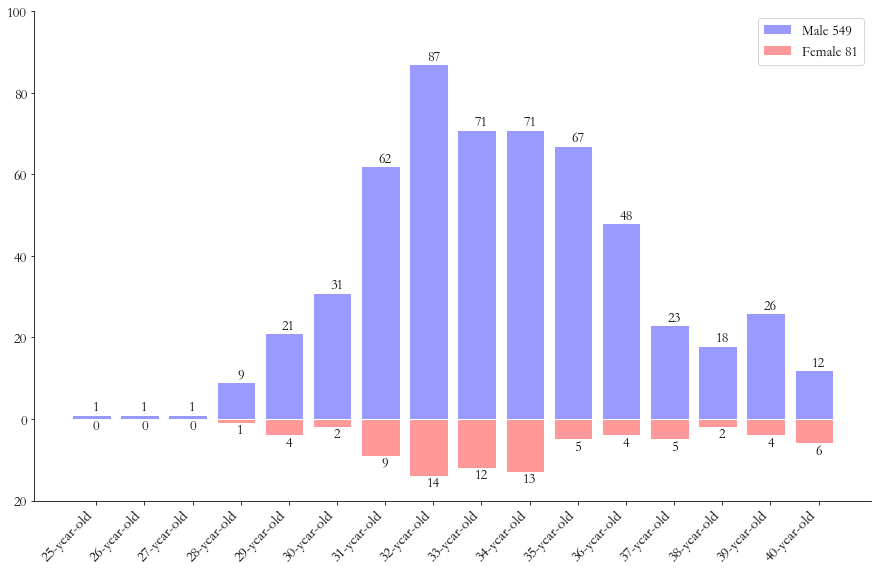

In [172]:
#Code to draw plot
font = {'family':'serif', 'weight' : 'normal','size': 14}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = (15,9)
bar_labels = age_count["age"].map(lambda x: str(x)+"-year-old").values
male = age_count["male_num"].values
female = age_count["female_num"].values
minus_female = [-int(i) for i in female]

X = np.arange(16)
for x,y in zip(X,male):
    plt.text(x+0.1, y+0.08, '%s' % y, ha='center', va="bottom")
for x,y in zip(X, minus_female):
    plt.text(x+0.1, y-0.08, "%s" % -y,ha='center', va='top' )
    
plt.bar(X, male, facecolor="#9999ff", edgecolor="white", label="Male 549")
plt.bar(X, minus_female, facecolor="#ff9999", edgecolor="white", label="Female 81")
x_pos = [x+0.1 for x in X]
plt.xticks(x_pos, bar_labels, fontsize=15)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment="right")

plt.setp(plt.gca().spines['right'].set_color('none'))
plt.setp(plt.gca().spines['top'].set_color('none'))
plt.setp(plt.gca().xaxis.set_ticks_position('bottom'))
plt.setp(plt.gca().yaxis.set_ticks_position('left'))
plt.yticks(plt.yticks()[0],  [int(i) for i in abs((plt.yticks()[0]))])
plt.legend()
plt.show()

In [18]:
qian.head()

,ID,Name,Gender,year-month-day,year_birth,university,major
0,1,张照亮,男,1980/12/14,1980,安徽农业大学,生命科学
1,2,田志宇,男,1984/10/31,1984,北京大学,数学
2,3,訚琪峥,男,1986/7/18,1986,北京大学,数学
3,4,周珍楠,男,1987/11/30,1987,北京大学,数学
4,5,何庆林,男,1988/10/5,1988,北京大学,物理


***
### 3. month distribution in each year

In [161]:
# Code to get the month distribution matrix in each year
qian["month"] = pd.Series([array[1] for array in qian["year-month-day"].str.split("/")])
qian["age"]   = pd.Series(2017 - np.array(qian["year_birth"]))
temp1 = pd.DataFrame(qian.groupby("age")["month"].apply(list))

def count_month(array):
    month_dict = {x:0 for x in range(1,13)}
    for moon in array:
        month_dict[int(moon)] += 1
    return month_dict.values()

temp1 = temp1["month"].apply(count_month)
temp_dict = {}
for key, value in  temp1.iteritems():
    temp_dict[key] = value
month_matrix = pd.DataFrame(temp_dict).T
month_matrix.columns = ["Jan","Feb","Mar","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec"]
month_matrix.index = month_matrix.index.map(lambda x: str(x)+"-year-old")
print month_matrix

             Jan  Feb  Mar  Apr  May  June  July  Aug  Sept  Oct  Nov  Dec
25-year-old    1    0    0    0    0     0     0    0     0    0    0    0
26-year-old    1    0    0    0    0     0     0    0     0    0    0    0
27-year-old    0    0    0    0    0     1     0    0     0    0    0    0
28-year-old    2    0    2    1    1     0     0    1     2    1    0    0
29-year-old    1    5    2    2    3     1     0    2     1    3    4    1
30-year-old    4    3    2    3    5     2     2    0     1    4    5    2
31-year-old    7    6    5    5    4    11     3    5     5    4   10    6
32-year-old    7   10   10    7    8     8     4    7    12    9   12    7
33-year-old    7    5   10    3    7     7     5    6     8   11    6    8
34-year-old    8    4    4    5    6     8     5   10    16    2    6   10
35-year-old    4    1    8    8    8     6     4    9     4    8    8    4
36-year-old    4    2    6    3    1     1     1    4     6   10    8    6
37-year-old    3    3    

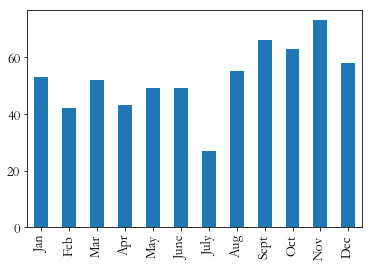

In [168]:
plt.rcParams['figure.figsize'] = (6,4)
month_matrix.sum().plot(kind="bar")
plt.show()


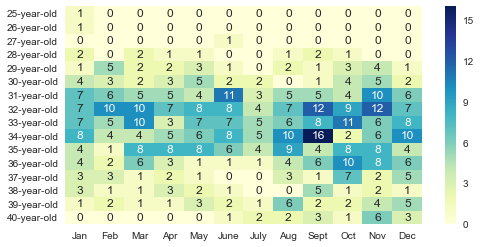

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(month_matrix,  annot=True, cmap="YlGnBu")
plt.show()

***
### 4. Which city is most attractive to those youth talents ?

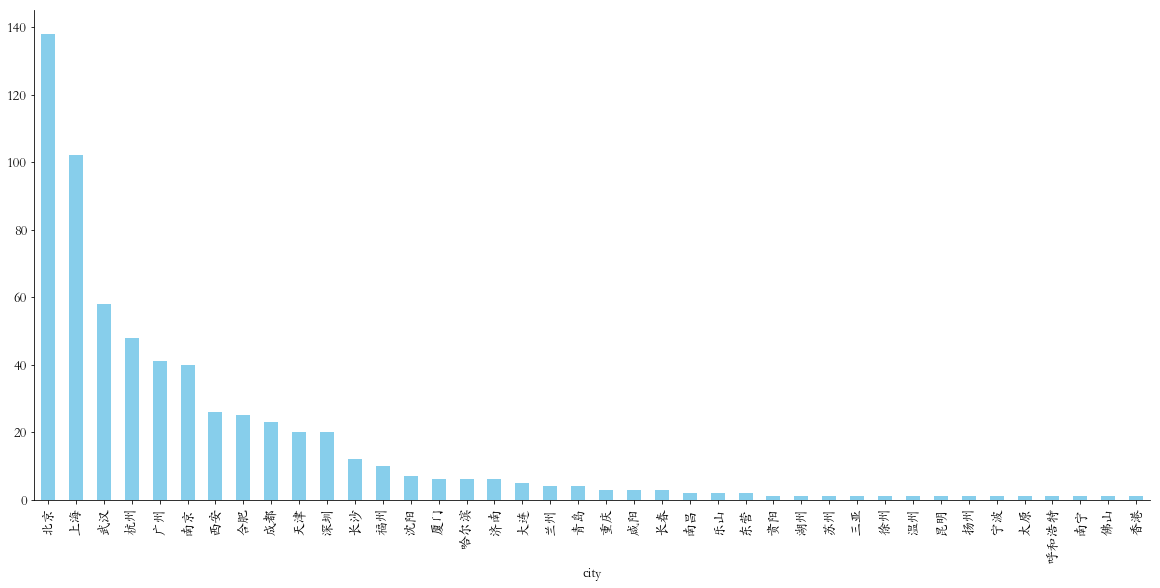

In [170]:
font = {'family' : 'STKaiti', 'weight' : 'normal','size': 14}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = (20,9)
school_count = pd.DataFrame(qian["university"].value_counts()).reset_index()
school_count.columns = ["university","num"]
Pcity = pd.read_excel("./data/university_province_city.xls",header=0)
temp2 = school_count.merge(Pcity)
temp2 = temp2.groupby("City").sum().reset_index()
temp2.columns = ["city","num"]
temp2 = temp2.sort_values("num", ascending=False)


temp2 = temp2.set_index("city")
temp2.plot(kind="bar", color="skyblue")
plt.legend().set_visible(False)
plt.setp(plt.gca().spines['right'].set_color('none'))
plt.setp(plt.gca().spines['top'].set_color('none'))
plt.setp(plt.gca().xaxis.set_ticks_position('bottom'))
plt.setp(plt.gca().yaxis.set_ticks_position('left'))

***
### 5. Major(displine) distribution.

In [119]:
temp3 = qian["major"].value_counts().reset_index(); temp3.columns = ["major","num"]
temp3.loc[3], temp3.loc[6] = temp3.loc[6], temp3.loc[3]
temp3 = temp3.set_index("major")
temp3

,num
major,
工程科学,119
信息科学,92
生命科学,83
医学,61
物理,65
环境与地球科学,61
化学,72
材料科学,42
数学,34


  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  bbox_to_anchor: unknown
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  contains: a callable function 
  default_handler_map: unknown
  figure: a :class:`matplotlib.figure.Figure` instance 
  frame_on: [ *True* | *False* ] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  path_effects: unknown
  picker: [None|float|boolean|callable] 
  rasterized: [True | False | None] 
  sketch_params: unknown
  snap: unknown
  title: unknown
  transform: :class:`~matplotlib.transforms.Transform` instance 
  url: a url string 
  visible: [True | False] 
  zorder: any number 


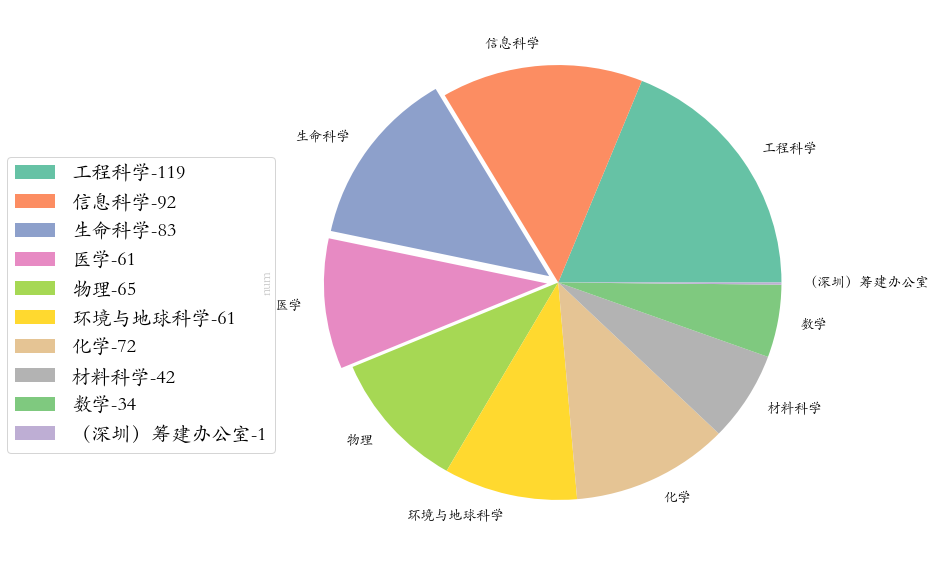

In [159]:
import brewer2mpl 
set2 = brewer2mpl.get_map('Set2','qualitative','8').mpl_colors + brewer2mpl.get_map('Accent','qualitative','6').mpl_colors
font = {'family' : 'STKaiti', 'weight' : 'normal','size': 14}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = (10,10)
explode = (0, 0,0.05,0.05, 0, 0, 0, 0, 0, 0)
X = temp3.index
Y = temp3["num"]
figlabel = []
for x,y in zip(X,Y):
    figlabel.append(x +"-"+ str(y))
temp3.plot(kind="pie",y="num",colors=set2,explode=explode)
plt.setp(plt.gca().legend(labels = figlabel, loc="best",bbox_to_anchor=(0.01,0.75), fontsize=20))
plt.show()